Introduction to Artificial Intelligence - TP1 - April 11th 2018 
--

At the end of this session, you will be able to : 
- Generate PyRat Datasets for a supervised learning setting
- Perform basic supervised learning tasks using sklearn
- Apply supervised learning on PyRat datasets 

In [1]:
# The tqdm package is useful to visualize progress with long computations. 
# Install it using pip 
import tqdm

Part 1 - Generating PyRat datasets
--
First and foremost you need the latest version of PyRat. To do that, just clone the [official PyRat repository](https://github.com/vgripon/pyrat). 

Syntax is "git clone repo destinationdir"

In [ ]:
### TO DO : open a terminal tab / window and clone the repo.

You can now launch Pyrat Games. 

In the context of the AI course, we are going to simplify the rules of PyRat a bit.
In fact, we are going to remove all walls and mud penalties. Also, we are not going to consider symmetric mazes anymore.

As such, a default game would be obtained with the following parameters:
<pre>python3 pyrat.py -p 40 -md 0 -d 0 --nonsymmetric</pre>

In the supervised and unsupervised projects, we are going to obtain data while looking at plays between two greedy algorithms. Generating 1000 such games while saving data is easily obtained with PyRat by using:
<pre>python3 pyrat.py -p 40 -md 0 -d 0 --nonsymmetric --rat AIs/manh.py --python AIs/manh.py --tests 1000 --nodrawing --synchronous --save</pre>

We recommend that you open another Terminal to launch this command, because generating 1000 games will take a few minutes, and you won't be able to evaluate any other cell from the jupyter notebook. 

It is possible to open a terminal window from the "Home" Interface of Jupyter Notebook.

PS: If you don't have pygame installed in your machine you can open a terminal and run

<pre>pip install pygame</pre>


The 1000 generated games will be in the "saves" folder.

In [ ]:
### TO DO : open a terminal tab / window and launch the command to generate the games

To convert the games into numpy arrays, we will make use of a few functions that we define here. Feel try to modify it later to your own needs. 

In [2]:
import numpy as np
import ast
import os

mazeHeight = 15
mazeWidth = 21

def convert_input(maze, mazeWidth, mazeHeight, piecesOfCheese):
    im_size = (mazeWidth, mazeHeight) 
    canvas = np.zeros(im_size,dtype=np.int8)
    for (x_cheese,y_cheese) in piecesOfCheese:
        canvas[x_cheese,y_cheese] = 1
    # For use with sklearn, we flatten the matrix into an vector
    return canvas.ravel()

PHRASES = {
    "# Random seed\n": "seed",
    "# MazeMap\n": "maze",
    "# Pieces of cheese\n": "pieces"    ,
    "# Rat initial location\n": "rat"    ,
    "# Python initial location\n": "python"   , 
    "rat_location then python_location then pieces_of_cheese then rat_decision then python_decision\n": "play"
}
 
MOVE_DOWN = 'D'
MOVE_LEFT = 'L'
MOVE_RIGHT = 'R'
MOVE_UP = 'U'
 
translate_action = {
    MOVE_LEFT:0,
    MOVE_RIGHT:1,
    MOVE_UP:2,
    MOVE_DOWN:3
}
 
def process_file(filename):
    f = open(filename,"r")    
    info = f.readline()
    params = dict(play=list())
    while info is not None:
        if info.startswith("{"):
            params["end"] = ast.literal_eval(info)
            break
        if "turn " in info:
            info = info[info.find('rat_location'):]
        if info in PHRASES.keys():
            param = PHRASES[info]
            if param == "play":
                rat = ast.literal_eval(f.readline())
                python = ast.literal_eval(f.readline())
                pieces = ast.literal_eval(f.readline())
                rat_decision = f.readline().replace("\n","")
                python_decision = f.readline().replace("\n","")
                play_dict = dict(
                    rat=rat,python=python,piecesOfCheese=pieces,
                    rat_decision=rat_decision,python_decision=python_decision)
                params[param].append(play_dict)
            else:
                params[param] = ast.literal_eval(f.readline())
        else:
            print("did not understand:", info)
            break
        info = f.readline()
    return params

Now we are ready to parse the "saves" folder in order to generate the data into a numpy array. 

**N.b. you don't have to run this cell if you want to just run through the provided correction of TP1, we provide a npz file with a saved dataset**

In [ ]:

games = list()
directory = "saves/"
for root, dirs, files in os.walk(directory):
    for filename in tqdm.tqdm(files):
        try:
            if filename.startswith("."):
                continue
            game_params = process_file(directory+filename)
            games.append(game_params)
        except:
            print("Filename {} did not work".format(filename))

x = np.array([]).reshape(0,mazeWidth * mazeHeight)
y = np.array([]).reshape(0,1)
wins_python = 0
wins_rat = 0
for game in tqdm.tqdm(games):
    if game["end"]["win_python"] == 1: 
        wins_python += 1
    elif game["end"]["win_rat"] == 1:
        wins_rat += 1    
    canvas = convert_input(game["maze"], mazeWidth, mazeHeight, game["play"][0]["piecesOfCheese"])
    if game["end"]["win_python"] == 1:
        y = np.append(y,1)
    elif game["end"]["win_rat"] == 1:
        y = np.append(y,-1)
    else:
        y = np.append(y,0)
    x = np.concatenate([x, canvas.reshape(1,-1)], axis=0)

x and y are numpy array, feel free to save them to a .npz file as seen in TP0. 

In [ ]:
### CELL TO BE COMPLETED
### CHECK THE SHAPES OF X AND Y 
### SAVE X AND Y IN A NPZ FILE 

print(x.shape,y.shape)
np.savez("dataset.npz",x=x,y=y)

Part 2 - Basics of machine learning using sklearn
--

sklearn is a very powerful package that implements most machine learning methods. sklearn also includes cross-validation procedures in order to prevent overfitting, many useful metrics and data manipulation techniques that enables very careful experimentations with machine learning. It is also very straightforward to use. We will introduce a few basic concepts of sklearn. 

First, it is very easy to simulate data with sklearn. 

In [3]:
from sklearn.datasets import make_blobs

Use the function make_blobs to generate clouds of points with $d=2$, and visualize them using the function scatter from matplotlib.pyplot. You can generate as many samples as you want.

You can generate several clouds of points using the argument centers. We recommend using random_state=0 so that your results are from the same distribution from our tests 

Vocabulary : n_samples is the number of generated samples, n_features is $d$ (number of dimensions), centers are the number of classes. 

hint : you can use the output "y" as an argument for the color argument ("c") of the scatter function

In [4]:
### CELL TO BE COMPLETED - generate blobs

x_blobs,y_blobs = make_blobs(n_samples=2000,n_features=2,centers=4,random_state=0)


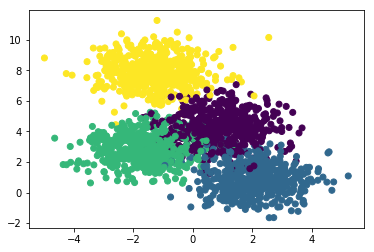

In [5]:
### CELL TO BE COMPLETED -  plot
### Don't forget to import pyplot and use %matplotlib inline

import matplotlib.pyplot as plt 

%matplotlib inline 

plt.scatter(x_blobs[:,0],x_blobs[:,1],c=y_blobs) 
# Here we use indexing to get feature 0 from all examples as the x-axis of our graph.
# Feature 1 from x is used as the y-axis of the graph. 
# The color of the points is determined by the value in y 


You can use the other arguments from make_blobs in order to change the variance of the blobs, or the coordinates of their center. You can also experiment in higher dimension, although it becomes difficult to visualize. 

sklearn has many other data generators, as well as ways to load standard datasets of various sizes. Check them out here : 

http://scikit-learn.org/stable/datasets/index.html


Now that we have generated a simple dataset, let's try to do a basic supervised learning approach. 

First, in order to mesure the model capability of generalizing, we will have to split the dataset into a training set and a test set. This split is also called cross validation. The test set is a part of your dataset that your model will not see during the training and will be used as a proxy for your "real world" examples.

<center><img src="https://cdn-images-1.medium.com/max/1600/1*u03UsvBGwkYD4E7BObpcaw.png"></center>
<center><small>Image taken from https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8</small></center>

Sklearn has functions to do so, with parameters controlling how to split the dataset so we are going to be showing how you should do. 

Use the train_test_split function in order to generate x_train,x_test, y_train, y_test, from the blobs we just generated, here we split the dataset in 80% train and 20% test. We use random_state = 0 so that the function always returns the same split.

In [6]:
from sklearn.model_selection import train_test_split

#### CELL TO BE COMPLETED 

x_train, x_test, y_train, y_test = train_test_split(x_blobs,y_blobs,test_size=0.2,random_state=0)

Check the shapes of the generated vectors

In [7]:
x_train.shape,x_test.shape,x_blobs.shape

((1600, 2), (400, 2), (2000, 2))

Let's use a K-Nearest Neighbor classifier to test whether we can classify this data. Create a <b>classifier</b>, train it using your <b> training set </b> and evaluate it by its <b>accuracy</b> on both <b>the train and test sets</b>. 

A k-nearest neighbor classifier (also known as KNN) is a method where for each object that you want to predict the class you look at the K (an hyperparameter) nearest examples from the training (using a distance metric, in our case the euclidean distance). This object is then classified by a majority vote from those neighbors, in other words the object is predicted with the most common class among its neighbours.

To use a Nearest Neighbor with sklearn you have to use the class [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

The sklearn API is consistent between the methods. This means that for almost every method they propose you can train it using [object.fit](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit), you can use it to make prediction with [object.predict](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict) and finally verify the <b>accuracy</b> of the method using [object.score](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
classifier = KNeighborsClassifier(n_neighbors=k,n_jobs=1)

### CELL TO BE COMPLETED - train the classifier and get the accuracy in both sets.
classifier.fit(x_train,y_train)
print("Accuracy on the training set {}%".format(classifier.score(x_train,y_train)*100))
print("Accuracy on the test set {}%".format(classifier.score(x_test,y_test)*100))

Accuracy on the training set 100.0%
Accuracy on the test set 91.0%


Your classifier should have a train accuracy of 1, while the test accuracy should be high but not perfect.

This is caused by the bias-variance trade-off. The 1NN classifier always has a bias of 0 (it perfectly classifies the training set) but it should have a high variance given that having one more example in the training set can completely change a decision.

To try to avoid having such a high variance, test different values of k and plot the accuracies given the different values of the hyperparameter k. 

If you have time we advise you to do the same analysis but varying the train/test split size.

100%|██████████| 24/24 [00:00<00:00, 57.20it/s]


Best k: 3, Best test accuracy 94.0%


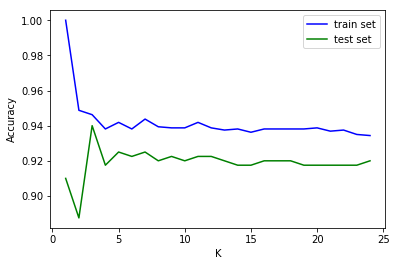

In [9]:
train_acc = list()
test_acc = list() # list to add the test set accuracies
test_ks = range(1,25)# list containing values of k to be tested

# CELL TO BE COMPLETED - Train networks with varying k
for k in tqdm.tqdm(test_ks):
    local_classifier = KNeighborsClassifier(n_neighbors=k)
    local_classifier.fit(x_train,y_train)
    train_acc.append(local_classifier.score(x_train,y_train))
    test_acc.append(local_classifier.score(x_test,y_test))

plt.plot(test_ks,train_acc,color="blue",label="train set")
plt.plot(test_ks,test_acc,color="green",label="test set")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
print("Best k: {}, Best test accuracy {}%".format(test_ks[np.argmax(test_acc)],max(test_acc)*100))

With the classifier trained, bias-variance analysed, it is now time to look at other metrics based on your results. It is important to remember that accuracy is a key metric, but it is not the <b> only </b> metric you should be focusing on.

We are going to be printing a [classification report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) and the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for both the training and test sets

In the classification report we are going to see 3 new metrics. They are really important because the accuracy does not show a complete portrait of your results.

* Precision: What is the percentage of cases that your model was correct while predicting the given class
* Recall: What is the percentage of cases that your model was correct when the example was a member of the given class.
* F1 Score: The harmonic mean from precision and recall.

Training Set:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       404
          1       1.00      1.00      1.00       397
          2       1.00      1.00      1.00       400
          3       1.00      1.00      1.00       399

avg / total       1.00      1.00      1.00      1600

[[404   0   0   0]
 [  0 397   0   0]
 [  0   0 400   0]
 [  0   0   0 399]]


Text(0,0.5,'Predicted class')

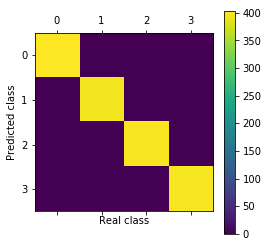

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred_train = classifier.predict(x_train)
report = classification_report(y_true=y_train,y_pred=y_pred_train)
matrix = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
print("Training Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

Test Set:
             precision    recall  f1-score   support

          0       0.80      0.90      0.84        96
          1       0.96      0.92      0.94       103
          2       0.90      0.84      0.87       100
          3       0.99      0.98      0.99       101

avg / total       0.91      0.91      0.91       400

[[86  3  6  1]
 [ 5 95  3  0]
 [15  1 84  0]
 [ 2  0  0 99]]


Text(0,0.5,'Predicted class')

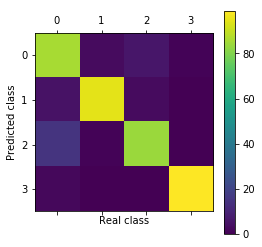

In [11]:
### CELL TO BE COMPLETED - Generate the report and confusion matrix for the test set.
y_pred_test = classifier.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred_test)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
print("Test Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

Finally we are going to plot the decision boundaries from our model. For this you should use the function plot_boundaries given below. You can only do this if the tensor representing your data is two dimensional.

This function will be testing our model with values ranging from the smallest x to the highest x and from the lowest y to the highest y each varying by $h$ and plotting it nicely. [Link to the original implementation](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

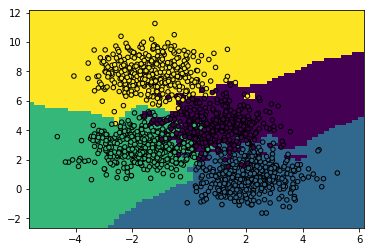

In [12]:
from matplotlib.colors import ListedColormap
def plot_boundaries(classifier,X,Y,h=0.2):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max,h),
                         np.arange(x1_min, x1_max,h))
    dataset = np.c_[x0.ravel(),x1.ravel()]
    Z = classifier.predict(dataset)

    # Put the result into a color plot
    Z = Z.reshape(x0.shape)
    plt.figure()
    plt.pcolormesh(x0, x1, Z)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y,
                edgecolor='k', s=20)
    plt.xlim(x0.min(), x0.max())
    plt.ylim(x1.min(), x1.max())
plot_boundaries(classifier,x_train,y_train)

Part 3 - Application to PyRat Datasets
--

Now it is your turn, generate a pyrat dataset, load it in the notebook and evaluate a KNN classifier using sklearn

In this corrected version of TP1, we load an example generated dataset

In [14]:
x = np.load("dataset_correction.npz")['x']
y = np.load("dataset_correction.npz")['y']

First we check the shapes for our x and y that we defined before

In [15]:
x.shape,y.shape

((1000, 315), (1000,))

As we did in the make blobs case, we are going to be splitting our data in train and test splits

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

We train a KNN classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
classifier = KNeighborsClassifier(n_neighbors=k,n_jobs=1)

### CELL TO BE COMPLETED - train the classifier and get the accuracy in both sets.
classifier.fit(x_train,y_train)
print("Accuracy on the training set {}%".format(classifier.score(x_train,y_train)*100))
print("Accuracy on the test set {}%".format(classifier.score(x_test,y_test)*100))

Accuracy on the training set 100.0%
Accuracy on the test set 47.5%


We find the best k value for this split. Normally this would be done over the mean best k value over several train/test splits

100%|██████████| 24/24 [00:07<00:00,  3.00it/s]


Best k: 10, Best test accuracy 54.50000000000001%
Accuracy on the training set 58.75%
Accuracy on the test set 54.50000000000001%


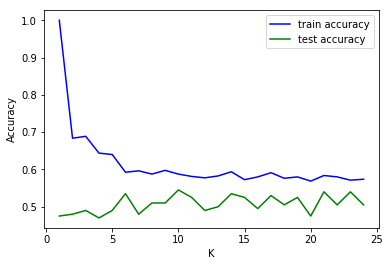

In [18]:
train_acc = list()
test_acc = list() # list to add the test set accuracies
test_ks = range(1,25)# list containing values of k to be tested

# CELL TO BE COMPLETED - Train networks with varying k
for k in tqdm.tqdm(test_ks):
    local_classifier = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    local_classifier.fit(x_train,y_train)
    train_acc.append(local_classifier.score(x_train,y_train))
    test_acc.append(local_classifier.score(x_test,y_test))

plt.plot(test_ks,train_acc,color="blue",label="train accuracy")
plt.plot(test_ks,test_acc,color="green",label="test accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
print("Best k: {}, Best test accuracy {}%".format(test_ks[np.argmax(test_acc)],max(test_acc)*100))


#Retrain the classifier with the best k for the analysis

from sklearn.neighbors import KNeighborsClassifier
k = test_ks[np.argmax(test_acc)]
classifier = KNeighborsClassifier(n_neighbors=k,n_jobs=1)

classifier.fit(x_train,y_train)
print("Accuracy on the training set {}%".format(classifier.score(x_train,y_train)*100))
print("Accuracy on the test set {}%".format(classifier.score(x_test,y_test)*100))

Show the classification report and confusion matrix

Training Set:
             precision    recall  f1-score   support

       -1.0       0.57      0.73      0.64       344
        0.0       0.31      0.04      0.07        99
        1.0       0.63      0.61      0.62       357

avg / total       0.56      0.59      0.56       800

[[250   5  89]
 [ 55   4  40]
 [137   4 216]]


Text(0,0.5,'Real Class')

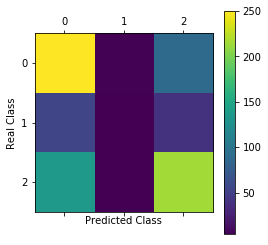

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred_train = classifier.predict(x_train)
report = classification_report(y_true=y_train,y_pred=y_pred_train)
matrix = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
print("Training Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()

plt.xlabel("Predicted Class")
plt.ylabel("Real Class")

Here we see that differently from the make blobs case the classes are not balanced, so even if you were correctly classyfing all of the draw examples, the color on the confusion matrix would make it seem like a bad model for that class. We have to normalize the confusion matrix by the amount of examples on each class, so that the sum of each row of the matrix is 1.

Training Set:
             precision    recall  f1-score   support

       -1.0       0.57      0.73      0.64       344
        0.0       0.31      0.04      0.07        99
        1.0       0.63      0.61      0.62       357

avg / total       0.56      0.59      0.56       800

[[250   5  89]
 [ 55   4  40]
 [137   4 216]]


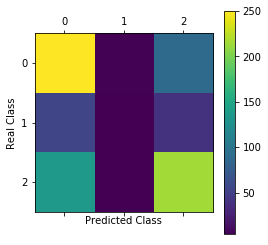

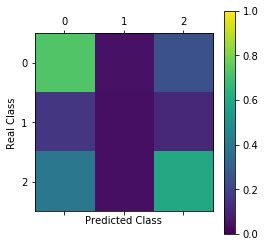

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred_train = classifier.predict(x_train)
report = classification_report(y_true=y_train,y_pred=y_pred_train)
matrix = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
normalized_matrix = matrix/np.sum(matrix,axis=1)
print("Training Set:")
print(report)
print(matrix)

plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")

plt.matshow(normalized_matrix,vmin=0,vmax=1)
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("Real Class");

And now the test set

Test Set:
             precision    recall  f1-score   support

       -1.0       0.60      0.58      0.59        96
        0.0       0.33      0.05      0.08        22
        1.0       0.50      0.63      0.56        82

avg / total       0.53      0.55      0.52       200

[[56  1 39]
 [ 9  1 12]
 [29  1 52]]
[[ 0.58333333  0.04545455  0.47560976]
 [ 0.09375     0.04545455  0.14634146]
 [ 0.30208333  0.04545455  0.63414634]]


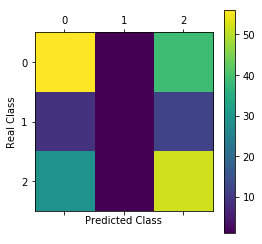

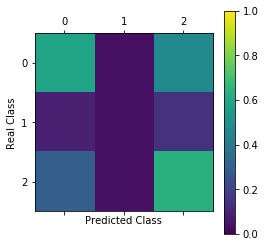

In [21]:
### CELL TO BE COMPLETED - Generate the report and confusion matrix for the test set.
y_pred_test = classifier.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred_test)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
normalized_matrix = matrix/np.sum(matrix,axis=1)

print("Test Set:")
print(report)
print(matrix)
print(normalized_matrix)


plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")

plt.matshow(normalized_matrix,vmin=0,vmax=1)
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("Real Class");

Here we can see that we have a real problem identifying the draws. This is caused by a problem called [Class Imbalance](http://www.chioka.in/class-imbalance-problem/).

This problem can create a bias in most algorithms leading to a poor recall percentage. On the other side of class imbalance we can see that the network overpredicts the -1 result, leading to a good recall percentage, but not necessarily good precision. Looking the effects of doing class balancing (using the indexing ideas from the end of TP0) could be very interesting for your project!